In [174]:
from matplotlib import pyplot as plt, patches as mpatches
import math
from math import sin, cos, tan, atan2
import numpy as np
from numpy import sin, cos, pi, linspace
import random

In [183]:
p_lim = 10

P1X = -p_lim
P1Y = p_lim
P2X = p_lim
P2Y = p_lim
P3X = p_lim
P3Y = -p_lim
P4X = -p_lim
P4Y = -p_lim

Robot moved to ( -7.176115715241274 , 5.246079882135927 ) heading  -1.2625212379998696
Robot moved to ( -6.772724882967458 , 6.26384389613001 ) heading  9.932587346811928


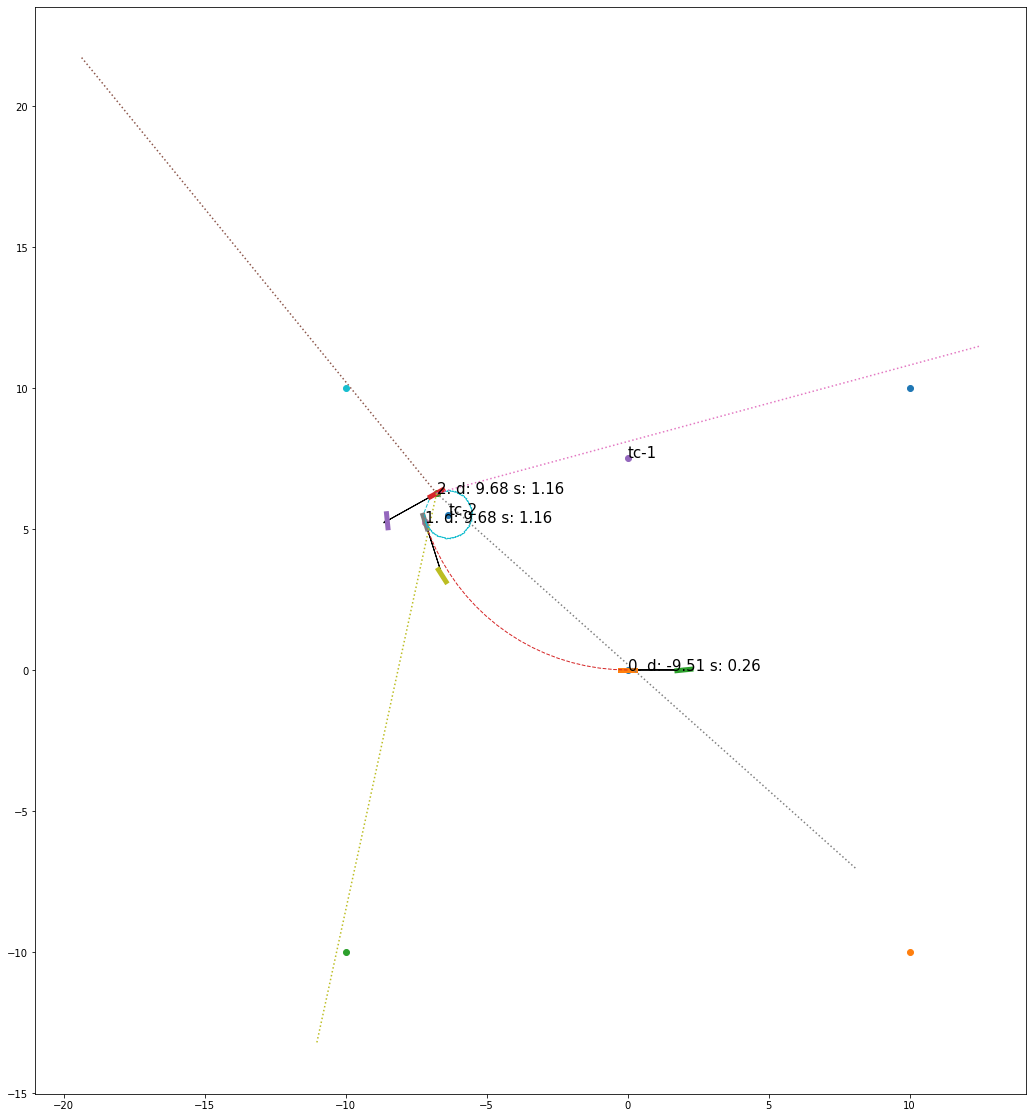

In [260]:
class Robot:
    def __init__(self, x0=0, y0=0, length=2, heading=0):
        self.x = x0
        self.y = y0
        self.length = length
        self.heading = heading
        self.steering = 0.1
        self.wheel_length = 0.5
        
    def _calc_turn_radius(self, steering):
        tan_a = tan(steering)
        if tan_a != 0:
            return self.length / tan_a
        else:
            return None
        
    def _calc_turn_center(self, turn_radius):
        if turn_radius is not None:
            return (self.x - turn_radius * sin(self.heading), self.y + turn_radius * cos(self.heading))
        else:
            return(None, None)
        
    def _calc_heading_after_move(self, turn_radius, distance):
        if turn_radius is not None:
            new_heading = self.heading + distance / turn_radius
            return new_heading
        else:
            return self.heading
        
    def _calc_position_after_move(self, turn_x, turn_y, turn_radius, new_heading):
        new_x = turn_x + turn_radius * sin(new_heading)
        new_y = turn_y - turn_radius * cos(new_heading)
        
        return (new_x, new_y)
    
    def move(self, distance, steering):
        self.steering = steering
        tr = self._calc_turn_radius(steering)
        if tr is not None:
            x_c, y_c = self._calc_turn_center(tr)
            new_heading = self._calc_heading_after_move(tr, distance)
            self.x, self.y = self._calc_position_after_move(x_c, y_c, tr, new_heading)
            self.heading = new_heading
            print('Robot moved to (', self.x, ',', self.y, ') heading ', self.heading)
        else:
            # TODO straight line
            pass
        
    def sense(self):
        mean = 0
        stand_dev = 0.05
        peleng1 = atan2(P1X - self.x, P1Y - self.y) + np.random.normal(mean, stand_dev)
        peleng2 = atan2(P2X - self.x, P2Y - self.y) + np.random.normal(mean, stand_dev)
        peleng3 = atan2(P3X - self.x, P3Y - self.y) + np.random.normal(mean, stand_dev)
        peleng4 = atan2(P4X - self.x, P4Y - self.y) + np.random.normal(mean, stand_dev)
        
        return (peleng1, peleng2, peleng3, peleng4)
            

class RobotPlotter:
    def __init__(self, robot: Robot):
        self._robot = robot
        
    def _plot_rear_wheel(self):
        hw = self._robot.wheel_length / 2
        x = self._robot.x
        y = self._robot.y
        heading = self._robot.heading
        plt.plot((x - hw * cos(heading), x + hw * cos(heading)),
                 (y - hw * sin(heading), y + hw * sin(heading)), lw=5)
        
    def _plot_front_wheel(self):
        hw = self._robot.wheel_length / 2
        x = self._robot.x
        y = self._robot.y
        heading = self._robot.heading
        length = self._robot.length
        steering = self._robot.steering
        plt.plot((x + length * cos(heading) - hw * cos(heading + steering),
                  x + length * cos(heading) + hw * cos(heading + steering)),
                 (y + length * sin(heading) - hw * sin(heading + steering),
                  y + length * sin(heading) + hw * sin(heading + steering)), lw=5)
    
    def _plot_heading(self):
        x = self._robot.x
        y = self._robot.y
        heading = self._robot.heading
        length = self._robot.length
        plt.arrow(x, y, length * cos(heading), length * sin(heading), head_width=0.05*length, label={})
        
    def _plot_trajectory(self, x_c, y_c, tr, dist):
        arc_angles = linspace(self._robot.heading - pi/2,self._robot.heading -pi/2 + dist/tr, 20)
        arc_xs = x_c + tr * cos(arc_angles)
        arc_ys = y_c + tr * sin(arc_angles)
        plt.plot(arc_xs, arc_ys, lw = 1, linestyle="--")
        arc_angles = None
        
    def draw_robot(self, distance, steering, i, draw_trajectory=True):
        plt.plot(self._robot.x, self._robot.y, marker="o")
        plt.gca().annotate(f'{i}. d: {distance:.2f} s: {steering:.2f}', xy=(self._robot.x, self._robot.y), xycoords='data', fontsize=15)
        
        self._plot_rear_wheel()
        self._plot_front_wheel()
        self._plot_heading()
        
        tr = self._robot._calc_turn_radius(steering)
        x_c, y_c = self._robot._calc_turn_center(tr)
        
        
        
        nx, ny = self._robot._calc_position_after_move(x_c, y_c, tr, self._robot._calc_heading_after_move(tr, distance))
        
        if draw_trajectory:
            self._plot_trajectory(x_c, y_c, tr, distance)
            
            plt.plot(x_c, y_c, marker="o")
            plt.gca().annotate(f'tc-{i+1}', xy=(x_c, y_c), xycoords='data', fontsize=15)
        
            plt.plot(nx, ny, marker="o")
        # plt.show()
        
    def draw_pelengs(self):
        p1, p2, p3, p4 = self._robot.sense()
        
        len = 20
        
        plt.plot((self._robot.x, self._robot.x + len * sin(p1)), 
                 (self._robot.y, self._robot.y + len * cos(p1)), linestyle=":")
        
        plt.plot((self._robot.x, self._robot.x + len * sin(p2)), 
                 (self._robot.y, self._robot.y + len * cos(p2)), linestyle=":")
        
        plt.plot((self._robot.x, self._robot.x + len * sin(p3)), 
                 (self._robot.y, self._robot.y + len * cos(p3)), linestyle=":")
        
        plt.plot((self._robot.x, self._robot.x + len * sin(p4)), 
                 (self._robot.y, self._robot.y + len * cos(p4)), linestyle=":")
        
        plt.plot(P1X, P1Y, marker="o")
        plt.plot(P2X, P2Y, marker="o")
        plt.plot(P3X, P3Y, marker="o")
        plt.plot(P4X, P4Y, marker="o")
    
    
bot = Robot(x0=0, y0=0, length=2, heading=0)
roboplotter = RobotPlotter(bot)

plt.figure(figsize=(20,20))
# ax_min = -5
# ax_max = 15
# plt.xlim([ax_min, ax_max])
# plt.ylim([ax_min, ax_max])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

for i in range(2):
    dist = random.uniform(-10, 10)
    steer = random.uniform(-1.4, 1.4)
    roboplotter.draw_robot(dist, steer, i)
    bot.move(dist, steer)
    
roboplotter.draw_robot(dist, steer, i+1, draw_trajectory=False)
roboplotter.draw_pelengs()



